In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as linreg
import pandas as pd
df = pd.read_excel('/Users/ianfla/Documents/GitHub/Lose-Weight/weight.xlsx', engine='openpyxl', header=None)
time = df[2].values[0:-1]
weight = df[1].values[0:-1]
goal = 60

In [2]:
df.tail(8)

,0,1,2
309,211029,69.3,349.0
310,211101,68.8,352.0
311,211103,68.8,354.0
312,211104,68.4,355.0
313,211105,68.1,356.0
314,211108,68.1,359.0
315,211109,67.9,360.0
316,211110,NaN,NaN


In [3]:
X = time.reshape([-1,1])
y = weight
fit1 = linreg().fit(X, y)
a1 = fit1.intercept_
b1 = fit1.coef_[0]
T1 = (goal - a1) / b1

memory = 10
fit2 = linreg().fit(X, y, sample_weight = np.exp((time - time[-1]) / memory))
a2 = fit2.intercept_
b2 = fit2.coef_[0]
T2 = (goal - a2) / b2

T = max(T1, T2)

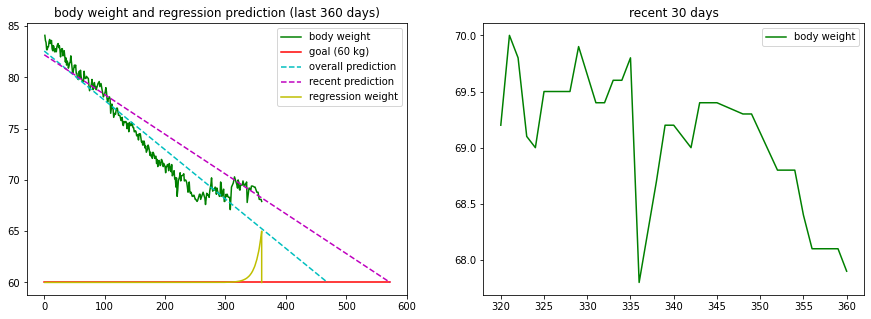

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(time, weight, c='g', label='body weight')
axs[0].plot([0, T], [goal, goal], c='r', label='goal ({} kg)'.format(goal))
axs[0].plot([0, T1], [a1, goal], 'c--', label='overall prediction')
if b2 < 0:
    axs[0].plot([0, T2], [a2, goal], 'm--', label='recent prediction')
    axs[0].plot(np.append(time, time[-1]), np.append(goal + 5*np.exp((time - time[-1]) / memory), goal), 
                c='y',label='regression weight')

axs[0].legend()
axs[0].set_title('body weight and regression prediction (last {} days)'.format(int(time[-1])))

axs[1].plot(time[-30:], weight[-30:], c='g', label='body weight')
axs[1].legend()
axs[1].set_title('recent 30 days')
plt.savefig('weight')